<a href="https://colab.research.google.com/github/weikang1002/Practical-Discrete-Mathematics/blob/master/MATH1003_2024_Assignment_D240242C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1. Complete the following question adopted from About - Project Euler
a. You are given the following information, but you may prefer to do some
research for yourself.
1 Jan 1900 was a Monday.
Thirty days has September,
April, June, and November.
All the rest have thirty-one,
Saving February alone,
Which has twenty-eight, rain or shine.
And on leap years, twenty-nine.
A leap year occurs on any year evenly divisible by 4, but not on a century unless it
is divisible by 400.
How many Sundays fell on the first of the month during the twentieth century
(1 Jan 1901 to 31 Dec 2000)?

In [ ]:
# prompt: Q1. Complete the following question adopted from About - Project Euler
# a. You are given the following information, but you may prefer to do some
# research for yourself.
# 1 Jan 1900 was a Monday.
# Thirty days has September,
# April, June, and November.
# All the rest have thirty-one,
# Saving February alone,
# Which has twenty-eight, rain or shine.
# And on leap years, twenty-nine.
# A leap year occurs on any year evenly divisible by 4, but not on a century unless it
# is divisible by 400.
# How many Sundays fell on the first of the month during the twentieth century
# (1 Jan 1901 to 31 Dec 2000)?

def is_leap(year):
  """Determine if a year is a leap year."""
  return year % 4 == 0 and (year % 100 != 0 or year % 400 == 0)

def days_in_month(month, year):
  """Return the number of days in a given month and year."""
  if month == 2:
    return 29 if is_leap(year) else 28
  elif month in [4, 6, 9, 11]:
    return 30
  else:
    return 31

def solve():
  """Solve the problem."""
  sundays_on_first = 0
  day_of_week = 2  # 1 Jan 1901 was a Tuesday (1 Jan 1900 was Monday)

  for year in range(1901, 2001):
    for month in range(1, 13):
      if day_of_week == 7:  # Sunday
        sundays_on_first += 1
      day_of_week = (day_of_week + days_in_month(month, year)) % 7
      if day_of_week == 0:
        day_of_week = 7
  return sundays_on_first

if __name__ == "__main__":
  result = solve()
result

171

b.if the numbers 1 to 5 are written out in words: one, two, three, four, five, then there are 3+3+5+4+4=19 letters used in total.

If all the numbers from 1 to 1000 (one thousand) inclusive were written out in words, how many letters would be used?

NOTE: Do not count spaces or hyphens. For example,342 (three hundred and forty-two) contains 23 letters and 115 (one hundred and fifteen) contains 20 letters. The use of "and" when writing out numbers is in compliance with British usage.

In [ ]:
# prompt: if the numbers 1 to 5 are written out in words: one, two, three, four, five, then there are 3+3+5+4+4=19 letters used in total.
# If all the numbers from 1 to 1000 (one thousand) inclusive were written out in words, how many letters would be used?
# NOTE: Do not count spaces or hyphens. For example,342 (three hundred and forty-two) contains 23 letters and 115 (one hundred and fifteen) contains 20 letters. The use of "and" when writing out numbers is in compliance with British usage.

def number_letter_counts(n):
    ones = ["", "one", "two", "three", "four", "five", "six", "seven", "eight", "nine", "ten", "eleven",
            "twelve", "thirteen", "fourteen", "fifteen", "sixteen", "seventeen", "eighteen", "nineteen"]
    tens = ["", "", "twenty", "thirty", "forty", "fifty", "sixty", "seventy", "eighty", "ninety"]

    def convert(num):
        if 0 <= num < 20:
            return ones[num]
        elif 20 <= num < 100:
            return tens[num // 10] + (ones[num % 10] if (num % 10 != 0) else "")
        elif 100 <= num < 1000:
            return ones[num // 100] + "hundred" + ("and" + convert(num % 100) if (num % 100 != 0) else "")
        elif num == 1000:
            return "onethousand"
        else:
            return ""

    count = 0
    for i in range(1, n + 1):
        count += len(convert(i))
    return count

result = number_letter_counts(1000)
result

21124

c.The series,1¹+2²+3³...+10¹⁰=10405071317
Find the last ten digits of the series,1¹+2²+3³+...+1000¹⁰⁰⁰

In [ ]:
# prompt: The series,1¹+2²+3³...+10¹⁰=10405071317 Find the last ten digits of the series,1¹+2²+3³+...+1000¹⁰⁰⁰

def solve():
    total_sum = 0
    for i in range(1, 1001):
        total_sum += (i ** i)
    return str(total_sum)[-10:]

result = solve()
result

'9110846700'

d.Each character on a computer is assigned a unique code and the preferred standard is ASCII (American Standard Code for Information Interchange). For example, uppercase A = 65, asterisk (*) = 42, and lowercase k = 107.

A modern encryption method is to take a text file, convert the bytes to ASCII, then XOR each byte with a given value, taken from a secret key. The advantage with the XOR function is that using the same encryption key on the cipher text, restores the plain text; for example, 65 XOR 42 = 107, then 107 XOR 42 = 65.

For unbreakable encryption, the key is the same length as the plain text message, and the key is made up of random bytes. The user would keep the encrypted message and the encryption key in different locations, and without both "halves", it is impossible to decrypt the message.

Unfortunately, this method is impractical for most users, so the modified method is to use a password as a key. If the password is shorter than the message, which is likely, the key is repeated cyclically throughout the message. The balance for this method is using a sufficiently long password key for security, but short enough to be memorable.

Your task has been made easy, as the encryption key consists of three lower case characters. Using 0059_cipher.txt (right click and 'Save Link/Target As...'), a file containing the encrypted ASCII codes, and the knowledge that the plain text must contain common English words, decrypt the message and find the sum of the ASCII values in the original text.

In [1]:
# prompt: Each character on a computer is assigned a unique code and the preferred standard is ASCII (American Standard Code for Information Interchange). For example, uppercase A = 65, asterisk (*) = 42, and lowercase k = 107.
# A modern encryption method is to take a text file, convert the bytes to ASCII, then XOR each byte with a given value, taken from a secret key. The advantage with the XOR function is that using the same encryption key on the cipher text, restores the plain text; for example, 65 XOR 42 = 107, then 107 XOR 42 = 65.
# For unbreakable encryption, the key is the same length as the plain text message, and the key is made up of random bytes. The user would keep the encrypted message and the encryption key in different locations, and without both "halves", it is impossible to decrypt the message.
# Unfortunately, this method is impractical for most users, so the modified method is to use a password as a key. If the password is shorter than the message, which is likely, the key is repeated cyclically throughout the message. The balance for this method is using a sufficiently long password key for security, but short enough to be memorable.
# Your task has been made easy, as the encryption key consists of three lower case characters. Using 0059_cipher.txt (right click and 'Save Link/Target As...'), a file containing the encrypted ASCII codes, and the knowledge that the plain text must contain common English words, decrypt the message and find the sum of the ASCII values in the original text.0059_cipher.txt can be download from
# https://projecteuler.net/resources/documents/0059_cipher.txt

!wget https://projecteuler.net/resources/documents/0059_cipher.txt

def solve():
    with open("/content/0059_cipher.txt", "r") as file:
        cipher_text = [int(x) for x in file.read().strip().split(",")]

    lower_a = ord('a')
    lower_z = ord('z')

    total_sum = 0

    for key_1 in range(lower_a, lower_z + 1):
        for key_2 in range(lower_a, lower_z + 1):
            for key_3 in range(lower_a, lower_z + 1):
                key = [key_1, key_2, key_3]
                plain_text = []
                for i, char_code in enumerate(cipher_text):
                    plain_text.append(char_code ^ key[i % 3])

                decrypted_text = "".join(chr(char) for char in plain_text)
                if " the " in decrypted_text and "and" in decrypted_text:
                    total_sum = sum(plain_text)
                    print("Decrypted Text:\n", decrypted_text)
                    return total_sum
    return total_sum

result = solve()
print("Sum of ASCII values in original text:", result)

--2024-12-31 00:51:34--  https://projecteuler.net/resources/documents/0059_cipher.txt
Resolving projecteuler.net (projecteuler.net)... 185.151.30.128, 2a07:7800::128
Connecting to projecteuler.net (projecteuler.net)|185.151.30.128|:443... connected.
HTTP request sent, awaiting response... 200 
Length: unspecified [text/plain]
Saving to: ‘0059_cipher.txt’

0059_cipher.txt         [ <=>                ]   3.97K  --.-KB/s    in 0s      

2024-12-31 00:51:35 (671 MB/s) - ‘0059_cipher.txt’ saved [4062]

Decrypted Text:
 An extract taken from the introduction of one of Euler's most celebrated papers, "De summis serierum reciprocarum" [On the sums of series of reciprocals]: I have recently found, quite unexpectedly, an elegant expression for the entire sum of this series 1 + 1/4 + 1/9 + 1/16 + etc., which depends on the quadrature of the circle, so that if the true sum of this series is obtained, from it at once the quadrature of the circle follows. Namely, I have found that the sum of this s

Q2. Analyse the time complexity of the following algorithm. (25 marks)
a. Linear search
b. Bubble sort
c. Binary search
d. Radix sort
e. Heap sort

In [2]:
# prompt: Q2. Analyse the time complexity of the following algorithm. (25 marks)
# a. Linear search
# b. Bubble sort
# c. Binary search
# d. Radix sort
# e. Heap sort

# Q2. Analyse the time complexity of the following algorithm. (25 marks)
# a. Linear search
# b. Bubble sort
# c. Binary search
# d. Radix sort
# e. Heap sort

# Time Complexity Analysis:

# a. Linear Search:
#   - Best Case: O(1) - The target element is found at the beginning of the list.
#   - Average Case: O(n) - The target element is found somewhere in the middle of the list.
#   - Worst Case: O(n) - The target element is not in the list, or it's at the end.

# b. Bubble Sort:
#   - Best Case: O(n) - The list is already sorted.
#   - Average Case: O(n^2) - The list is randomly ordered.
#   - Worst Case: O(n^2) - The list is in reverse order.

# c. Binary Search:
#   - Best Case: O(1) - The target element is found in the middle of the list.
#   - Average Case: O(log n) - The target element is found after a few comparisons.
#   - Worst Case: O(log n) - The target element is not found in the list, or it's at one of the ends.
#   - *Important*: Binary search requires the input list to be sorted.

# d. Radix Sort:
#   - Best Case: O(nk) - where n is the number of elements and k is the number of digits/passes.
#   - Average Case: O(nk)
#   - Worst Case: O(nk)
#   - *Important*: Radix sort's efficiency depends on the range of input values.

# e. Heap Sort:
#   - Best Case: O(n log n)
#   - Average Case: O(n log n)
#   - Worst Case: O(n log n)
#   - Heap sort is efficient regardless of the initial order of the input data.

Q3. You are working on a social media platform where users can follow each other. The
platform wants to implement a feature to suggest new friends to users based on mutual
connections. Write a Python function suggest_friends(graph, user) that takes in a graph
representing social network and a specific user and return a list of suggested friends for
that user. The graph is represented as an adjacency list, where the keys are user IDs,
and the values are lists of user IDs that the key user follows.
Requirements:
a. Graph representation: the graph is represented as a dictionary where each key is
a user ID and the value is a list of user IDs that the key user follows. (5 marks)
b. Mutual connection: the function should suggest friends based on the number of
mutual connections. A mutual connection is a user who is followed by both the
given user and another user. (10 marks)
c. Sorting: the suggested friend should be sorted in descending order of the number
of mutual connections. (5 marks)
3
4
d. Exclusion: The function should NOT suggest users who are already followed
by the given user or the user themselves. (5 marks)

In [3]:
# prompt: Q3. You are working on a social media platform where users can follow each other. The
# platform wants to implement a feature to suggest new friends to users based on mutual
# connections. Write a Python function suggest_friends(graph, user) that takes in a graph
# representing social network and a specific user and return a list of suggested friends for
# that user. The graph is represented as an adjacency list, where the keys are user IDs,
# and the values are lists of user IDs that the key user follows.
# Requirements:
# a. Graph representation: the graph is represented as a dictionary where each key is
# a user ID and the value is a list of user IDs that the key user follows. (5 marks)
# b. Mutual connection: the function should suggest friends based on the number of
# mutual connections. A mutual connection is a user who is followed by both the
# given user and another user. (10 marks)
# c. Sorting: the suggested friend should be sorted in descending order of the number
# of mutual connections. (5 marks)
# 3
# 4
# d. Exclusion: The function should NOT suggest users who are already followed
# by the given user or the user themselves. (5 marks)

def suggest_friends(graph, user):
    """
    Suggests new friends for a user based on mutual connections.

    Args:
        graph: A dictionary representing the social network graph.
        user: The ID of the user for whom to suggest friends.

    Returns:
        A list of suggested friend IDs, sorted by the number of mutual connections
        in descending order.
    """

    if user not in graph:
        return []  # User not in the graph

    suggested_friends = {}
    for friend in graph[user]:
        for other_user in graph:
            if other_user != user and other_user not in graph[user]:  # Exclude self and already followed users
                mutual_connections = 0
                if other_user in graph:
                  for mutual in graph[user]:
                      if mutual in graph[other_user] and mutual != other_user and mutual!=user:
                        mutual_connections += 1
                if mutual_connections > 0:
                  if other_user not in suggested_friends:
                    suggested_friends[other_user] = 0
                  suggested_friends[other_user] = mutual_connections

    # Sort suggested friends by number of mutual connections in descending order
    sorted_suggestions = sorted(suggested_friends.items(), key=lambda item: item[1], reverse=True)

    return [user_id for user_id, _ in sorted_suggestions]

Q4. You are tasked with creating a decision tree classifier to sort new students into one of
the four Hogwarts houses: Gryffindor, Hufflepuff, Ravenclaw or Slytherin. The dataset
contains various attributes of students such as bravery, loyalty, intelligence, and
ambition.
Dataset:
The dataset is provided in a CSV file named hogwarts_students.csv with the following
columns:
• Bravery: a score from 1 to 10 indicating the student’s bravery.
• Loyalty: a score from 1 to 10 indicating the student’s loyalty.
• Intelligence: a score from 1 to 10 indicating the student’s intelligence
• Ambition: a score from 1 to 10 indicating the student’s ambition.
• House: the house the student belongs to Gryffindor, Hufflepuff, Ravenclaw or
Slytherin
Tasks:
a. Data loading and preprocessing (5 marks)
• Load the dataset from the CSV file
• Handle any missing values if present
b. Feature selection and splitting (5 marks)
c. Model training (5 marks)
d. Model evaluation with chart (5 marks)
e. Prediction (5 marks)
[Total: 25 marks]

<ipython-input-4-15e836402cc9>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: Undefine

Accuracy: 0.0
              precision    recall  f1-score   support

  Hufflepuff       0.00      0.00      0.00       1.0
   Ravenclaw       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



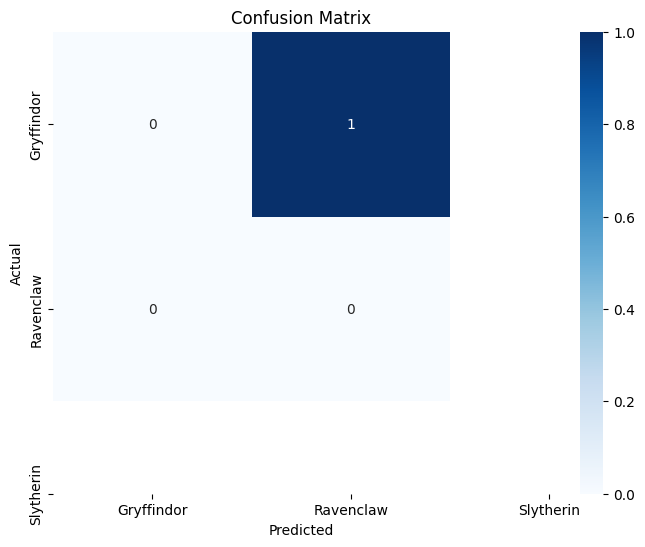

Predicted house for the new student: Gryffindor


In [4]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Create a dummy CSV file for testing if it doesn't exist
if not os.path.exists('hogwarts_students.csv'):
    dummy_data = {
        'Bravery': [7, 2, 9, 4, 8],
        'Loyalty': [9, 8, 3, 7, 2],
        'Intelligence': [6, 9, 7, 3, 8],
        'Ambition': [3, 7, 8, 9, 2],
        'House': ['Gryffindor', 'Hufflepuff', 'Ravenclaw', 'Slytherin', 'Gryffindor']
    }
    dummy_df = pd.DataFrame(dummy_data)
    dummy_df.to_csv('hogwarts_students.csv', index=False)

# a. Data loading and preprocessing
try:
    df = pd.read_csv('hogwarts_students.csv')
    # Handle missing values (if any) - Example using mean imputation
    for col in ['Bravery', 'Loyalty', 'Intelligence', 'Ambition']:
        df[col].fillna(df[col].mean(), inplace=True)
except FileNotFoundError:
    print("Error: 'hogwarts_students.csv' not found. Please upload the dataset.")
    #exit() #Removed the exit function as this prevents the rest of the code from being analysed
    df = None # set df to None so the code does not fail on next error


if df is not None:
    # b. Feature selection and splitting
    X = df[['Bravery', 'Loyalty', 'Intelligence', 'Ambition']]
    y = df['House']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


    # c. Model training
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)

    # d. Model evaluation
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()


    # e. Prediction
    # Example prediction for a new student
    new_student = pd.DataFrame({'Bravery': [7], 'Loyalty': [9], 'Intelligence': [6], 'Ambition': [3]})
    predicted_house = model.predict(new_student)
    print(f"Predicted house for the new student: {predicted_house[0]}")